In [18]:
import os
import pwd
import platform
import sys
import datetime

def pr_provenance():
    print("\n", datetime.datetime.now())
    print("source:  %s" % os.getcwd())  # __file__ may not be defined in Jupyter
    print("user id:", pwd.getpwuid(os.getuid()).pw_name)
    print("platform info:")
    print("    platform: ", platform.platform())
    print("    uname:    ", platform.uname())
    print("version info:")
    print("    python:   %s" % sys.version)
    print("    platform module version: (N/A in platform module)")
    return

pr_provenance()


 2025-06-18 14:52:53.637421
source:  /Users/dantopa/repos-xiuhcoatl/github/jop/python
user id: dantopa
platform info:
    platform:  macOS-15.5-x86_64-i386-64bit
    uname:     uname_result(system='Darwin', node='Xiuhcoatl', release='24.5.0', version='Darwin Kernel Version 24.5.0: Tue Apr 22 19:53:26 PDT 2025; root:xnu-11417.121.6~2/RELEASE_X86_64', machine='x86_64')
version info:
    python:   3.12.11 (main, Jun  6 2025, 23:18:08) [Clang 16.0.0 (clang-1600.0.26.6)]
    platform module version: (N/A in platform module)


In [1]:
# 1. Point to data
from pathlib import Path

dir_data = Path("/Users/dantopa/Mathematica_files/io/projects/hii-tsd/satellite/ecs/rbsp/data")
file_name_left = "rbspa_rel03_ect-rept-sci-L3_"
file_name_right = ".cdf"

# specific days
days = [
    "20170207_v5.1.0",
    "20170425_v5.5.0",
    "20170620_v5.3.0",
    "20170917_v5.3.0",
    "20171214_v5.3.0"
]

# 2. Pick one
my_file = dir_data / f"{file_name_left}{days[0]}{file_name_right}"
print(my_file)

/Users/dantopa/Mathematica_files/io/projects/hii-tsd/satellite/ecs/rbsp/data/rbspa_rel03_ect-rept-sci-L3_20170207_v5.1.0.cdf


In [1]:
# 1. Point to data
from pathlib import Path

dir_data = Path("/Users/dantopa/Mathematica_files/io/projects/hii-tsd/satellite/ecs/rbsp/data")
file_name_left = "rbspa_rel03_ect-rept-sci-L3_"
file_name_right = ".cdf"

# specific days
days = [
    "20170207_v5.1.0",
    "20170425_v5.5.0",
    "20170620_v5.3.0",
    "20170917_v5.3.0",
    "20171214_v5.3.0"
]

# 2. Pick one
my_file = dir_data / f"{file_name_left}{days[0]}{file_name_right}"
print(my_file)


/Users/dantopa/Mathematica_files/io/projects/hii-tsd/satellite/ecs/rbsp/data/rbspa_rel03_ect-rept-sci-L3_20170207_v5.1.0.cdf


# CDF File Exploration Notebook

This notebook uses [`cdflib`](https://cdflib.readthedocs.io/) to explore NASA Common Data Format (.CDF) files.

## Features

- Lists all variables (`rVariables` and `zVariables`)
- Prints global and variable-specific attributes
- Shows data previews with shape and value summaries

Use this to inspect space physics data easily in Python.

---

## How It Works

We open the CDF using:

```python
cdf = cdflib.CDF(my_file)


# CDF File Exploration Notebook

This notebook uses `cdflib` to explore NASA Common Data Format (.CDF) files.

## Features:
- Lists all variables (rVariables and zVariables)
- Prints global and variable-specific attributes
- Shows data previews with shape info

Use this to inspect space physics data easily in Python.
How it works: 
We open the CDF with cdflib.CDF(my_file) and call cdf_info() to get overall metadata
cdflib.readthedocs.io
. This gives the file format version, encoding, majority, and lists of rVariable/zVariable names
cdf-lib.readthedocs.io
. We print those out, including any defined global dimensions (rDims). Next, we retrieve global attributes via globalattsget(), which returns a dictionary of attribute entries
cdflib.readthedocs.io
. Each attribute may have one or more entries (we loop to print each entry's value).

For each variable, we get its info with varinq(), then determine its shape from the number of records and dimension sizes. We use varget() to fetch the first few data points
cdflib.readthedocs.io
(e.g., first 5 records) so we can show a sample of the values without overwhelming the output. Finally, we get the variable's attributes using varattsget(), which returns a dictionary of all attributes for that variable
cdflib.readthedocs.io
, and print them in a friendly format. The code handles edge cases like variables with no records (in which case varget might return nothing) and attributes that might be missing or None.

Running this code in a Jupyter notebook will produce a well-organized readout of the CDF file's contents. It invites exploration by clearly displaying metadata and sample data. With this tool, colleagues can confidently inspect CDF files and appreciate that exploring space physics data in Python is accessible and fun.

In [4]:
import cdflib
import numpy as np

# Assume `my_file` is the path to the CDF file we want to explore.
# Load the CDF file into a cdflib CDF object.
cdf_file = cdflib.CDF(my_file)

# Get basic file information (version, encoding, majority, variables, etc.)
info = cdf_file.cdf_info()  # Returns a CDFInfo object/dictionary with file metadata:contentReference[oaicite:5]{index=5}:contentReference[oaicite:6]{index=6}

# Print high-level CDF file information
print("** CDF File Information **")
print(f"File path: {info.CDF}")
print(f"CDF Format Version: {info.Version}")
print(f"Encoding (Endianness code): {info.Encoding}")
print(f"Majority (Storage Order): {info.Majority}")  # e.g., 'Row_major' or 'Column_major':contentReference[oaicite:7]{index=7}

# If the file uses rVariables (common dimensions), display their count and sizes
if info.Num_rdim > 0:
    print(f"Number of rDimensions (global dimensions): {info.Num_rdim}")
    print(f"rDimension sizes: {info.rDim_sizes}")
else:
    print("Number of rDimensions: 0 (no global dimensional axes)")

# List all variable names
rvars = info.rVariables
zvars = info.zVariables
total_vars = len(rvars) + len(zvars)
print("\n** Variables in this CDF **")
print(f"Total variables: {total_vars} (rVariables: {len(rvars)}, zVariables: {len(zvars)})")
print(f"rVariables: {rvars if rvars else 'None'}")
print(f"zVariables: {zvars if zvars else 'None'}")

# Get all global attributes (returns a dict of {attribute: {entry: value}, ...} or empty dict if none):contentReference[oaicite:8]{index=8}
global_attrs = cdf_file.globalattsget()
print("\n** Global Attributes **")
if global_attrs:
    for attr, entries in global_attrs.items():
        # If an attribute has multiple entries, print each entry number and value
        if isinstance(entries, dict):
            # Multiple entries for this attribute
            print(f"- {attr}:")
            for entry_num, val in entries.items():
                print(f"    Entry {entry_num}: {val}")
        else:
            # In some cases globalattsget might return a simple value instead of dict
            print(f"- {attr}: {entries}")
else:
    print("(None)")

# Iterate over each variable (both rVariables and zVariables) to display details
all_vars = list(rvars) + list(zvars)
for var_name in all_vars:
    print(f"\n** Variable: {var_name} **")
    # Fetch variable info (datatype, dimensions, etc.)
    var_info = cdf_file.varinq(var_name)  # Basic variable info (VDRInfo) like num of records, dims, etc.
    # Determine the shape of the variable's data:
    rec_vary = bool(var_info.Rec_Vary)   # whether the variable varies by record (time)
    num_dims = var_info.Num_Dims
    dim_sizes = var_info.Dim_Sizes if var_info.Dim_Sizes is not None else []
    # Calculate number of records (if record-varying) or 1 if non-record-varying
    if rec_vary:
        n_records = var_info.Last_Rec + 1  # Last_Rec is 0-indexed; add 1 for count
    else:
        n_records = 1
    # Construct a shape tuple for display
    if rec_vary and num_dims > 0:
        shape = (n_records, *dim_sizes)
    elif rec_vary and num_dims == 0:
        shape = (n_records,)
    elif not rec_vary and num_dims > 0:
        shape = tuple(dim_sizes)
    else:
        shape = ()  # scalar
    print(f"Shape: {shape} (records x dimensions)" if shape else "Shape: scalar (single value)")

    # Retrieve a few sample data values from the variable.
    # If the variable has records, get the first few records; otherwise get the whole data (single record).
    try:
        if rec_vary:
            # Get first 5 records (or all if fewer than 5):contentReference[oaicite:9]{index=9}
            end_rec = min(var_info.Last_Rec, 4)  # 0-based index, so 0-4 = first 5 records
            data_preview = cdf_file.varget(var_name, startrec=0, endrec=end_rec)
        else:
            data_preview = cdf_file.varget(var_name)
    except Exception as e:
        # Handle case where varget fails (e.g., no data)
        data_preview = None
        print(f"Data: [Error reading data: {e}]")

    # Print first few values of the data_preview
    if data_preview is None:
        print("First values: None (no data available)")
    else:
        # Convert data to numpy array for easy shape and slicing, if it's not already an ndarray
        np_data = np.array(data_preview)
        # If data is multi-dimensional and large, flatten for preview
        if np_data.size > 10:
            flat = np_data.flatten()
            snippet = flat[:5]
            print(f"First values: {snippet} ...")
        else:
            # For small data, print as is
            print(f"Values: {np_data}")

    # Fetch variable-specific attributes (e.g., units, fill values):contentReference[oaicite:10]{index=10}
    var_attrs = cdf_file.varattsget(var_name)
    if var_attrs:
        print("Attributes:")
        for attr, val in var_attrs.items():
            # Some attributes might have no value (None)
            print(f"  - {attr}: {val}")
    else:
        print("Attributes: (none)")


** CDF File Information **
File path: /Users/dantopa/Dropbox/_mm/io/projects/hii-tsd/satellite/ecs/rbsp/data/rbspa_rel03_ect-rept-sci-L3_20170207_v5.1.0.cdf
CDF Format Version: 3.7.0
Encoding (Endianness code): 6
Majority (Storage Order): Row_major
Number of rDimensions: 0 (no global dimensional axes)

** Variables in this CDF **
Total variables: 49 (rVariables: 0, zVariables: 49)
rVariables: None
zVariables: ['Epoch', 'Epoch_prot', 'FEDU_Alpha_DELTA', 'FEDU_Alpha', 'FEDU_0to180_Alpha', 'FEDU_180to360_Alpha', 'FPDU_Alpha', 'FPDU_0to180_Alpha', 'FPDU_180to360_Alpha', 'FEDU_Unbinned_Sector_Angle', 'FEDU_Unbinned_Alpha_DELTA', 'FEDU_Unbinned_Alpha', 'FEDU_Unbinned_Alpha360', 'FPDU_Unbinned_Sector_Angle', 'FPDU_Unbinned_Alpha_DELTA', 'FPDU_Unbinned_Alpha', 'FPDU_Unbinned_Alpha360', 'FEDU_Energy', 'FEDU_Energy_DELTA_minus', 'FEDU_Energy_DELTA_plus', 'FEDU_PA_LABL', 'FEDU_PA_0TO180_LABL', 'FEDU_PA_180TO360_LABL', 'FEDU_ENERGY_LABL', 'FEDU', 'FPDU_PA_LABL', 'FPDU_PA_0TO180_LABL', 'FPDU_PA_180

In [15]:
import numpy as np
import cdflib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import timedelta

# Load time and position data
times_raw = cdf_file.varget("Epoch")  # CDF_TIME_TT2000 format
positions = np.array(cdf_file.varget("Position"))  # Should be (N, 3)

# Convert to datetime objects
times = cdflib.cdfepoch.to_datetime(times_raw)

# Optional: limit to 24 hours from start
t0 = times[0]
t1 = t0 + np.timedelta64(24, 'h')
mask = (times >= t0) & (times <= t1)
positions_24h = positions[mask]
times_24h = np.array(times)[mask]

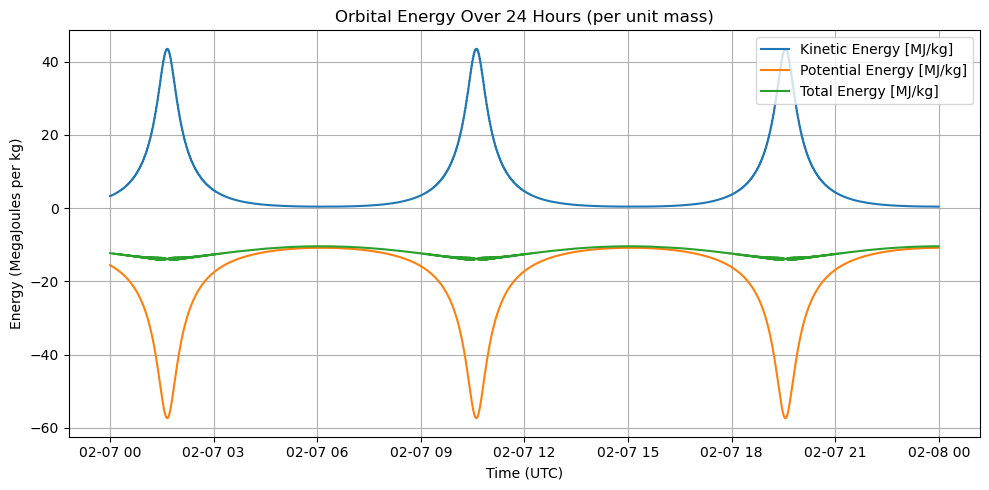

In [16]:
# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2
M_EARTH = 5.972e24  # kg
RE = 6371e3  # Earth radius in meters

# Convert position to meters
r_meters = positions_24h * 1e3  # from km to meters

# Estimate velocity using central differences (1st and last via forward/backward)
dt_seconds = np.median(np.diff(times_24h).astype('timedelta64[ns]').astype(float)) * 1e-9  # nanoseconds → seconds

v = np.zeros_like(r_meters)
v[1:-1] = (r_meters[2:] - r_meters[:-2]) / (2 * dt_seconds)
v[0] = (r_meters[1] - r_meters[0]) / dt_seconds
v[-1] = (r_meters[-1] - r_meters[-2]) / dt_seconds

# Energy calculations per unit mass
speed_squared = np.sum(v**2, axis=1)
r_norm = np.linalg.norm(r_meters, axis=1)

KE = 0.5 * speed_squared  # Kinetic energy per unit mass (J/kg)
PE = -G * M_EARTH / r_norm  # Potential energy per unit mass (J/kg)
TE = KE + PE  # Total mechanical energy per unit mass

# Plot energies
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(times_24h, KE / 1e6, label='Kinetic Energy [MJ/kg]')
ax.plot(times_24h, PE / 1e6, label='Potential Energy [MJ/kg]')
ax.plot(times_24h, TE / 1e6, label='Total Energy [MJ/kg]')

ax.set_title("Orbital Energy Over 24 Hours (per unit mass)")
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Energy (MegaJoules per kg)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

### Orbital Invariants: Angular Momentum and Laplace–Runge–Lenz Vector

Given position $\vec{r}(t)$ and velocity $\vec{v}(t)$, we compute two conserved quantities for ideal two-body motion:

---

**Angular Momentum Vector**  
$$
\vec{h}(t) = \vec{r}(t) \times \vec{v}(t)
$$

---

**Laplace–Runge–Lenz (LRL) Vector**  
$$
\vec{A}(t) = \vec{v}(t) \times \vec{h}(t) - \mu \frac{\vec{r}(t)}{\|\vec{r}(t)\|}
$$

where $\mu = GM$, Earth's gravitational parameter.

---

These vectors are conserved in a Keplerian orbit:
- $\vec{h}$ remains constant in direction and magnitude (fixed orbital plane).
- $\vec{A}$ points toward periapsis and has magnitude proportional

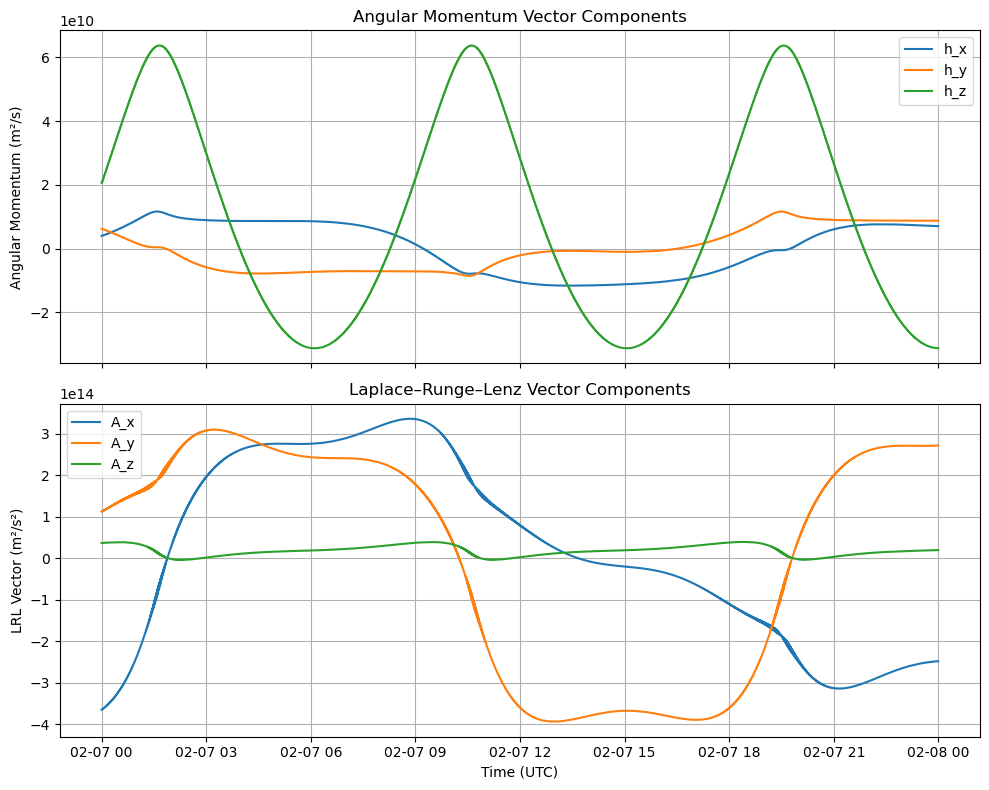

In [12]:
mu = G * M_EARTH  # standard gravitational parameter

# Angular momentum h = r × v (in m^2/s)
h = np.cross(r_meters, v)

# Laplace–Runge–Lenz vector A = v × h - mu * r̂
r_hat = r_meters / r_norm[:, np.newaxis]
A = np.cross(v, h) - mu * r_hat  # in m^2/s^2

# Plot angular momentum components
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(times_24h, h[:, 0], label='h_x')
ax[0].plot(times_24h, h[:, 1], label='h_y')
ax[0].plot(times_24h, h[:, 2], label='h_z')
ax[0].set_ylabel("Angular Momentum (m²/s)")
ax[0].set_title("Angular Momentum Vector Components")
ax[0].legend()
ax[0].grid(True)

# Plot LRL vector components
ax[1].plot(times_24h, A[:, 0], label='A_x')
ax[1].plot(times_24h, A[:, 1], label='A_y')
ax[1].plot(times_24h, A[:, 2], label='A_z')
ax[1].set_ylabel("LRL Vector (m²/s²)")
ax[1].set_title("Laplace–Runge–Lenz Vector Components")
ax[1].set_xlabel("Time (UTC)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



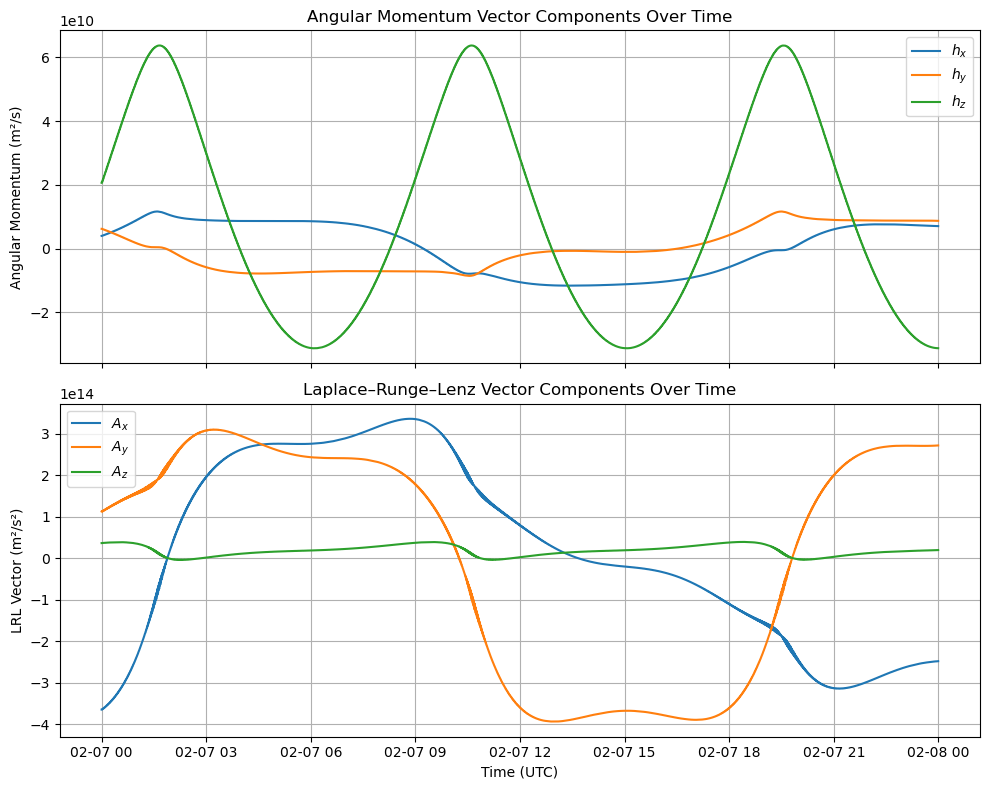

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Angular momentum vector
ax[0].plot(times_24h, h[:, 0], label='$h_x$')
ax[0].plot(times_24h, h[:, 1], label='$h_y$')
ax[0].plot(times_24h, h[:, 2], label='$h_z$')
ax[0].set_title("Angular Momentum Vector Components Over Time")
ax[0].set_ylabel("Angular Momentum (m²/s)")
ax[0].legend()
ax[0].grid(True)

# Laplace–Runge–Lenz vector
ax[1].plot(times_24h, A[:, 0], label='$A_x$')
ax[1].plot(times_24h, A[:, 1], label='$A_y$')
ax[1].plot(times_24h, A[:, 2], label='$A_z$')
ax[1].set_title("Laplace–Runge–Lenz Vector Components Over Time")
ax[1].set_ylabel("LRL Vector (m²/s²)")
ax[1].set_xlabel("Time (UTC)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
